# Distribute savings over the year on a monthly basis

In [1]:
# Creating a list of the payments per day
money_list = []
for day in range(365):
    money_list.append(day + 1)

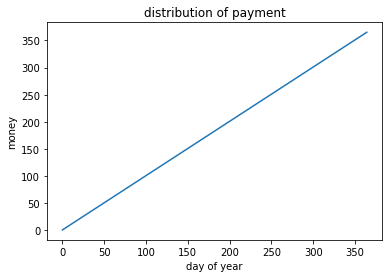

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(money_list)
plt.xlabel('day of year')
plt.ylabel('money')
plt.title('distribution of payment')
plt.show()

In [3]:
# Total
total_money = sum(money_list)
# Mean
import math
mean_money = sum(money_list) / 365
# Deviation
x = []
for item in money_list:
    x.append((item - (sum(money_list) / 365)) ** 2)
dev_money = math.sqrt(sum(x) / 365)

Total money to be saved next year: 66,795.00
Average payments per day: 183.00
Average payments per month: 5,566.25
Standard deviation: 105.37


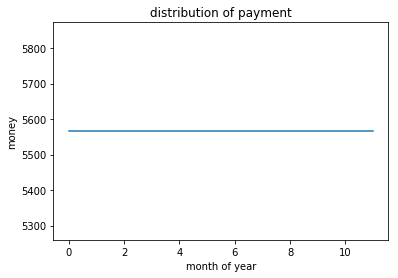

In [4]:
# Total and average monthly payments
print('Total money to be saved next year: {:,.2f}'.format(total_money))
print('Average payments per day: {:,.2f}'.format(mean_money))
print('Average payments per month: {:,.2f}'.format(sum(money_list) / 12))
print('Standard deviation: {:,.2f}'.format(dev_money))
plt.plot([sum(money_list) / 12 for i in range(1, 13, 1)])
plt.xlabel('month of year')
plt.ylabel('money')
plt.title('distribution of payment')
plt.show()

In [5]:
# Check Binomial distribution
from scipy.stats import binom
n, p = 10000000, 0.0000008
mean, var, skew, kurt = binom.stats(n, p, loc = -3, moments = 'mvsk')
print('Mean: {}, Variance: {}, Skewness: {}, Kurtosis: {}'.format(
    mean, 
    round(var.item(), 2), 
    round(skew.item(), 2), 
    round(kurt.item(), 2)
    ))

Mean: 5.0, Variance: 8.0, Skewness: 0.35, Kurtosis: 0.12


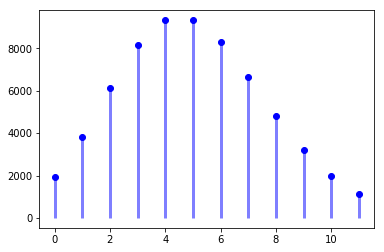

[ -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.]


In [6]:
# Plot binomial distribution in money terms
import numpy as np
x = list(range(0, 12, 1))
plt.plot(x, binom.pmf(x, n, p, -3) * total_money, 'bo')
plt.vlines(x, 0, binom.pmf(x, n, p, -3) * total_money, colors='b', lw=3, alpha=0.5)
plt.show()
print(np.arange(binom.ppf(0.01, n, p, -3), binom.ppf(0.99, n, p, -3)))

In [7]:
# Check what percentage is fitted in the 12 months
print('Percentage of total money distributed in 12 months: {:,.2f}'.format(sum(binom.pmf(x, n, p, -3))))
print('Money included {:,.2f}, of {:,.2f}'.format(sum(binom.pmf(x, n, p, -3) * total_money), total_money))

Percentage of total money distributed in 12 months: 0.97
Money included 64,723.63, of 66,795.00


In [8]:
# Current monthly distribution
import pandas as pd
import calendar
monthly_payments_binom = [binom.pmf(i, n, p, -3) * total_money for i in x]
payments_df = pd.DataFrame(
    monthly_payments_binom, 
    columns = ['payments'], 
    index = [calendar.month_name[i] for i in range(1, 13, 1)]
    ).round(0)

In [9]:
payments_df

,payments
January,1912.0
February,3824.0
March,6119.0
April,8158.0
May,9324.0
June,9324.0
July,8288.0
August,6630.0
September,4822.0
October,3215.0


In [10]:
# Calculate all the money that was cut before January
pre_jan = sum(binom.pmf(list(range(-3, 0, 1)), n, p, -3) * total_money)
print('Need to add to Jan: {:,.2f}'.format(pre_jan))

Need to add to Jan: 918.69


In [11]:
# Calculate all the money that was cut after December
post_dec = sum(binom.pmf(list(range(12, 60, 1)), n, p, -3) * total_money)
print('Need to add to Dec: {:,.2f}'.format(post_dec))

Need to add to Dec: 1,152.68


In [12]:
# Addind the rests
payments_df.payments[0] = payments_df.payments[0] + pre_jan
payments_df.payments[11] = payments_df.payments[11] + post_dec
payments_final = payments_df.round(0).astype(int)
payments_final

,payments
January,2831
February,3824
March,6119
April,8158
May,9324
June,9324
July,8288
August,6630
September,4822
October,3215


In [13]:
print('Total savings {} vs calculated total savings {}'.format(total_money, int(payments_final.sum()[0])))

Total savings 66795 vs calculated total savings 66796


## Saved 1 Baht more than we should

In [14]:
# Find days to add to the specific months
rev_mon_list = list(reversed(money_list))
data = payments_final.payments.to_dict()
for key in sorted(data, key=data.get, reverse=True):
    print('{}: average needed is {:,.2f}'.format(key, data[key]/30))
    data[key] = []
    for number, item in enumerate(rev_mon_list):
        if sum(data[key]) + item <= payments_final.payments[key]:
            data[key].append(item)
            rev_mon_list.pop(number)
            # unfinished, need to find number of days in resp. month, then finding specific values to fill.
print(data)
print(rev_mon_list)
for key, value in data.items():
    print(sum(value) - payments_final.payments[key])

May: average needed is 310.80
June: average needed is 310.80
July: average needed is 276.27
April: average needed is 271.93
August: average needed is 221.00
March: average needed is 203.97
September: average needed is 160.73
February: average needed is 127.47
October: average needed is 107.17
January: average needed is 94.37
December: average needed is 76.10
November: average needed is 65.93
{'January': [219, 176, 153, 138, 130, 122, 116, 112, 108, 104, 100, 96, 93, 90, 88, 86, 84, 81, 79, 77, 75, 73, 71, 69, 67, 65, 63, 60, 36], 'February': [278, 234, 211, 196, 188, 180, 172, 163, 159, 155, 150, 146, 142, 139, 137, 135, 133, 131, 129, 127, 125, 123, 121, 119, 30, 1], 'March': [334, 291, 270, 254, 246, 238, 230, 222, 217, 213, 209, 205, 201, 197, 195, 193, 191, 189, 187, 185, 183, 181, 179, 177, 175, 173, 169, 167, 165, 83], 'April': [358, 342, 326, 311, 303, 295, 287, 280, 276, 272, 268, 264, 260, 256, 253, 251, 249, 247, 245, 243, 241, 239, 237, 235, 233, 231, 229, 227, 225, 223, 221

In [15]:
# Some of the averages may be a bit too high.
# Better to flatten the curve. 